In [4]:
library(foreign) # library for importing sav file (SPSS) into R.
#library(nortest) # library for testing for normality

In [5]:
dataset = read.spss("trig.sav", to.data.frame=TRUE)

In [6]:
# Practical Week 2 
# Retrieve the file trig.sav. The data for this example are from a study of obese patients who took a drug and followed a weight reduction programme for 8 weeks. 
# One objective of the study was to see whether weight loss leads to reductions in triglyceride levels.   
# The weight loss and reduction in triglyceride levels-together with few other variables- for 34 patients were recorded.  

# 1. Plot the scatter diagram of reduction in triglyceride against weight-loss, add the regression line and comment. 
#    Carry out the regression of the reduction in triglyceride levels on weight-loss. 
# 2. How large/small is R-squared? 
# 3.  Is the regression statistically significant? 
# 4. What is the estimate of s^2 ? 
# 5. Write down the regression equation. 
# 6. Check the validity of assumptions of the regression as described in the lecture. 

In [7]:
str(dataset)

'data.frame':	36 obs. of  6 variables:
 $ basewt   : num  84 88.8 87 84.5 69.4 ...
 $ wk8weight: num  82.4 87 81.8 80.4 69 ...
 $ basetrig : num  90 137 182 72 143 96 115 124 188 167 ...
 $ wk8trig  : num  131 82 152 72 126 157 88 123 255 87 ...
 $ wtloss   : num  1.6 1.8 5.2 4.1 0.4 ...
 $ trigredn : num  -41 55 30 0 17 -61 27 1 -67 80 ...
 - attr(*, "variable.labels")= Named chr  "Weight at Baseline (kg)" "Weight at Week 8 (kg)" "Triglyceride level at Baseline (mg/dl)" "Triglyceride level at Week 8 (mg/dl)" ...
  ..- attr(*, "names")= chr  "basewt" "wk8weight" "basetrig" "wk8trig" ...
 - attr(*, "codepage")= int 65001


In [8]:
dataset$variable.labels

NULL

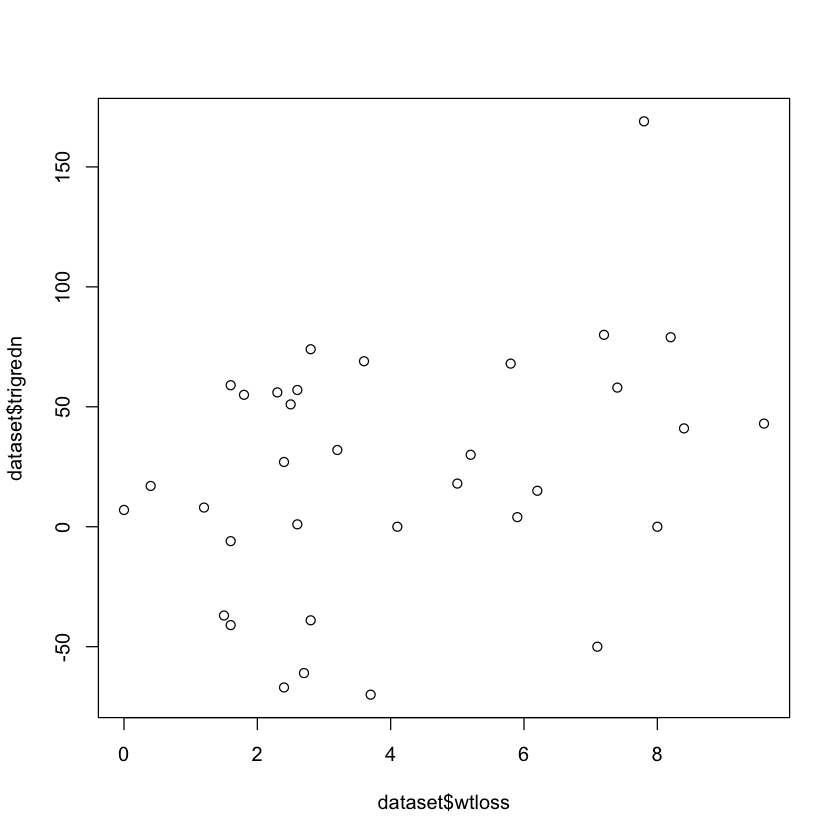

In [9]:
plot(dataset$wtloss, dataset$trigredn)

In [10]:
fitted_model <- lm(trigredn ~ wtloss, dataset)

In [11]:
summary(fitted_model)


Call:
lm(formula = trigredn ~ wtloss, data = dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-91.51 -27.78   2.84  37.12 122.94 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -4.638     15.635  -0.297   0.7687  
wtloss         6.499      3.226   2.015   0.0524 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48.8 on 32 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1126,	Adjusted R-squared:  0.08484 
F-statistic: 4.059 on 1 and 32 DF,  p-value: 0.0524


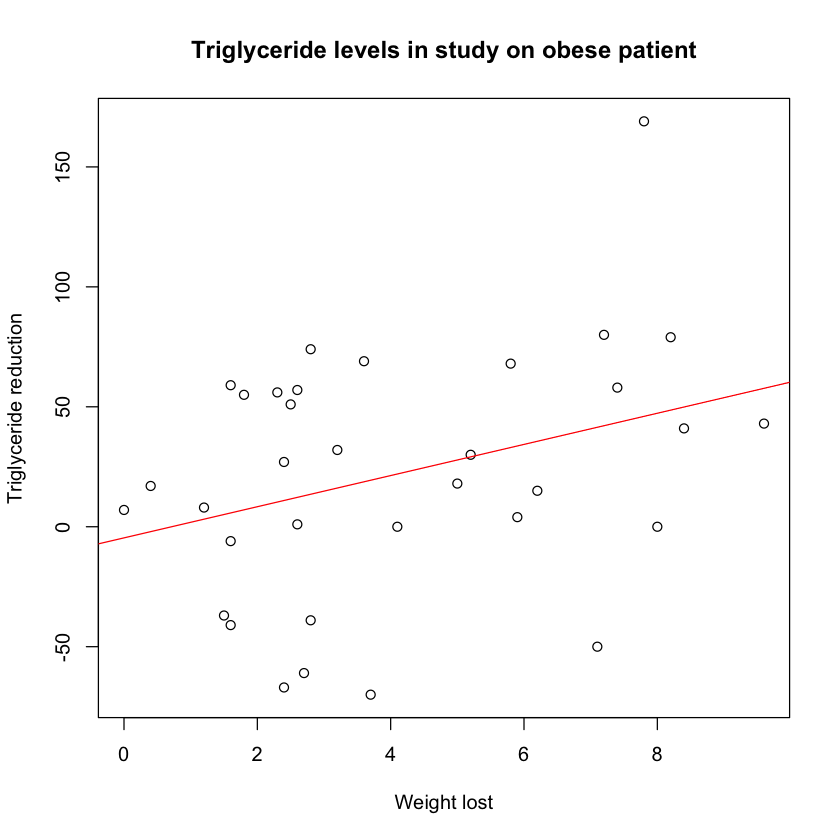

In [12]:
plot(dataset$wtloss, dataset$trigredn, main="Triglyceride levels in study on obese patient", xlab="Weight lost", ylab='Triglyceride reduction')
abline(fitted_model, col='red')

In [13]:
# From summary statistics, for H_0: /Beta = 0, p_value = 0.0524,
# Null hypothesis is that Y and X are uncorrelated, beta=0, the p value says this is marginally insignificant (~5%)

In [14]:
anova(fitted_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
wtloss,1,9666.838,9666.838,4.059131,0.05240066
Residuals,32,76208.132,2381.504,NA,NA


In [15]:
# What is the estimate of  s^2?
# s^2 = 2381.503, s = 48.80066, 

In [16]:
# Tests for normality

In [17]:
residual.varnmae = residuals(fitted_model)

In [18]:
# lillie.test(residual.varname)
# shapiro.test(residual.varname)

In [19]:
# TODO: other tests for assumptions from the lectures